# Task-5:Exploratory Data Analysis - SPORTS 
**GRIP : The Sparks Foundation (GRIP-July 2021)**

**Author -Ishan Ayus**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv('matches.csv')
df2 = pd.read_csv('deliveries.csv')

In [3]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
df1.shape

(636, 18)

In [6]:
df2.shape

(179078, 21)

Data Cleaning

In [7]:
df1.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [8]:
#As no of null in umpire3 is same as total no of rows thus all values in column umpire 3 is null 
df1.drop(['umpire3'], axis=1, inplace=True)
df1.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


In [9]:
df2.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [10]:
print(df1.duplicated().sum())
print(df2.duplicated().sum())

0
23


In [11]:
df2.drop_duplicates(inplace=True)
df2.duplicated().sum()

0

Data Exploration

In [12]:
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 17 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
dtypes: int64(5), object(12)
memory usage: 84.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 179055 entries, 0 to 179077
Data columns (total 21 columns):
match_id            179055 non-null int64
inning              179055 

In [13]:
df1.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,636.000000,636.000000,636.000000,636.000000,636.000000
mean,318.500000,2012.490566,0.025157,13.682390,3.372642
std,183.741666,2.773026,0.156726,23.908877,3.420338
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,159.750000,2010.000000,0.000000,0.000000,0.000000
50%,318.500000,2012.000000,0.000000,0.000000,4.000000
75%,477.250000,2015.000000,0.000000,20.000000,7.000000
max,636.000000,2017.000000,1.000000,146.000000,10.000000


In [14]:
df2.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000
mean,1801.169758,1.482969,10.162916,3.615543,0.000452,0.036726,0.004937,0.021133,0.004183,0.000056,1.246913,0.067035,1.313948
std,3471.116142,0.502075,5.677628,1.806869,0.021264,0.251177,0.116487,0.194907,0.070497,0.016711,1.608322,0.342567,1.605470
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


**Exploratory Analysis**

In [15]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


**Matches in each season**

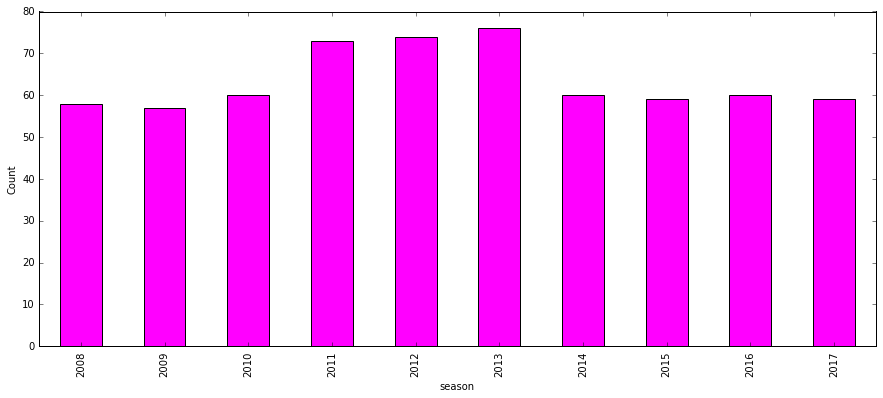

In [16]:
df1.groupby(['season'])['season'].count().plot.bar(figsize=(15,6), color='magenta')
plt.xlabel('season')
plt.ylabel('Count')
plt.show()

 In the year 2013, most of the matches were played.

**Most man of the match awards**

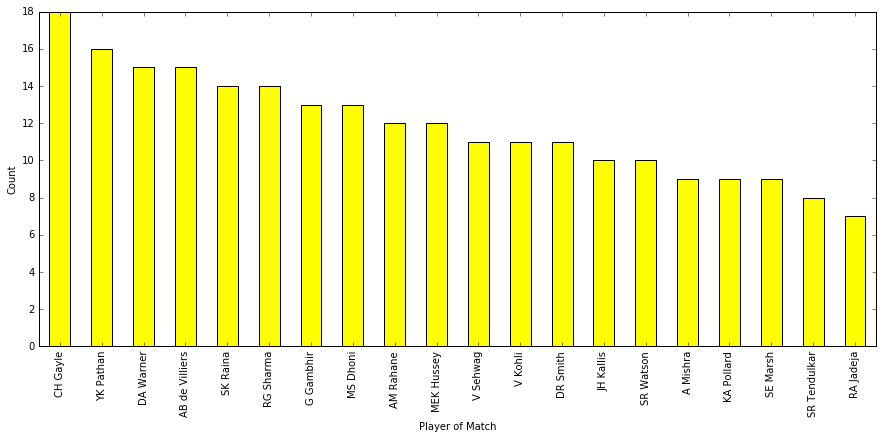

In [17]:
df1['player_of_match'].value_counts()[0:20].plot.bar(figsize=(15,6), color='yellow')
plt.xlabel('Player of Match')
plt.ylabel('Count')
plt.show()

CH Gayle has received most of the Man of the match awards

**winner of IPL**

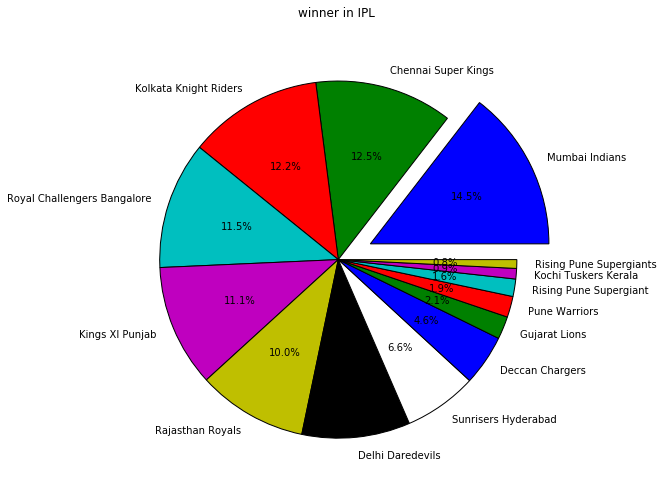

In [18]:
plt.figure(figsize=(8,8))
plt.pie(list(df1['winner'].value_counts()),labels=list(df1['winner'].value_counts().keys()),explode=(0.2,0,0,0,0,0,0,0,0,0,0,0,0,0), autopct='%0.1f%%')
plt.title("winner in IPL \n")
plt.show()

Mumbai Indians team had maximum number of wins. 

**Toss wining count in ipl**

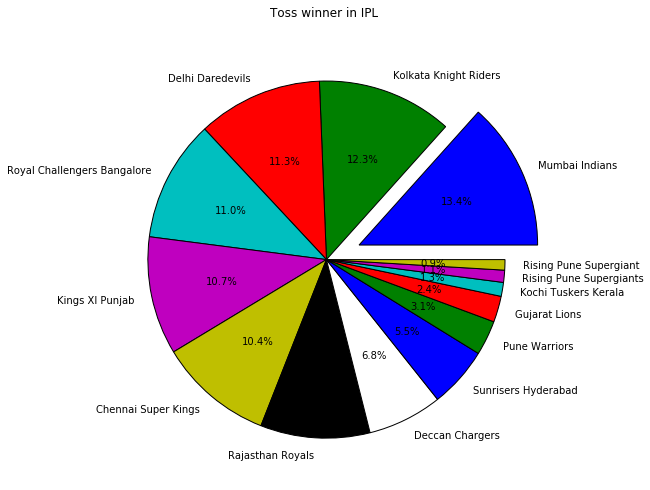

In [19]:
plt.figure(figsize=(8,8))
plt.pie(list(df1['toss_winner'].value_counts()),labels=list(df1['toss_winner'].value_counts().keys()),explode=(0.2,0,0,0,0,0,0,0,0,0,0,0,0,0), autopct='%0.1f%%')
plt.title("Toss winner in IPL \n")
plt.show()

Mumbai Indian are the top Toss are winner

**umpire umpiring most of the match**

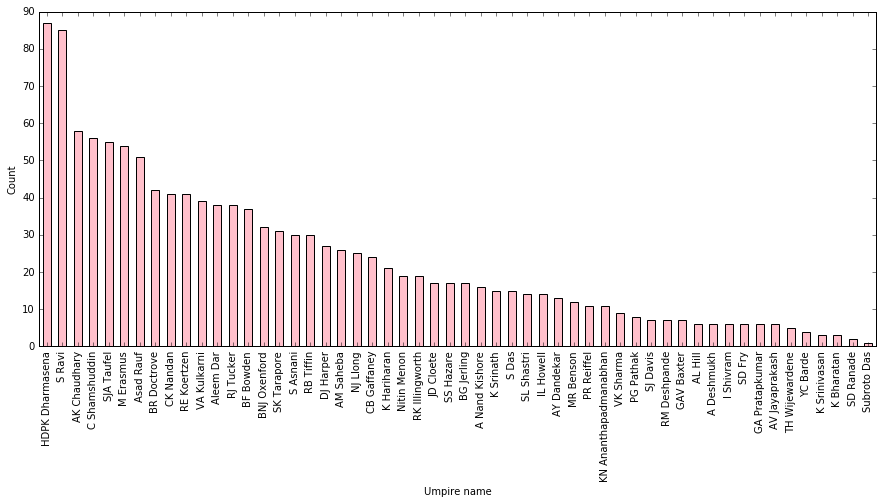

In [20]:
k=pd.DataFrame(pd.concat([df1['umpire1'], df1['umpire2']]),columns = ['Umpire'])
k['Umpire'].value_counts().plot.bar(figsize=(15,6),color='pink')
plt.xlabel('Umpire name')
plt.ylabel('Count')
plt.show()

HDPK Dharmasena was the umpire of most of the matches

**Cities**

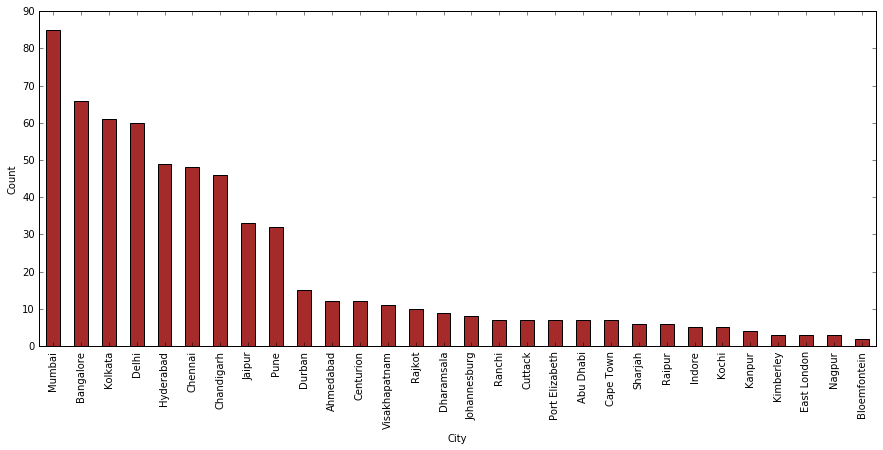

In [21]:
df1['city'].value_counts().plot.bar(figsize=(15,6), color='brown')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

Most matches were played in Mumbai

**Matches played in stadium**

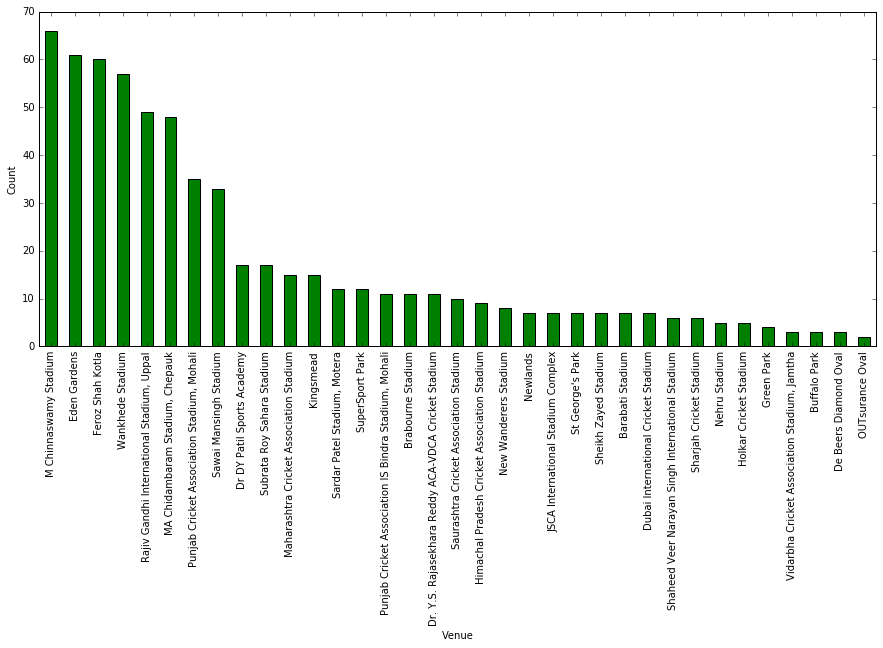

In [22]:
df1['venue'].value_counts().plot.bar(figsize=(15,6), color='g')
plt.xlabel('Venue')
plt.ylabel('Count')
plt.show()

Most matches were played in M Chinnaswamy Stadium

**Top 5 Stadium wise winning Analysis **

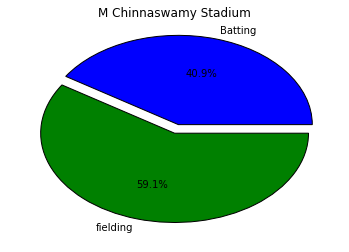

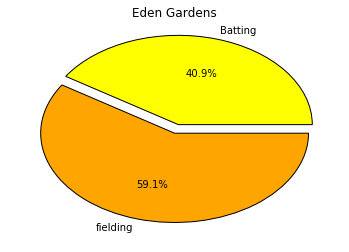

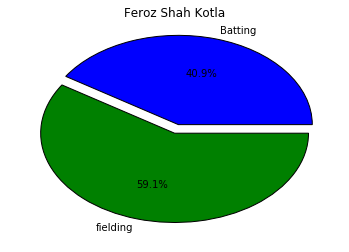

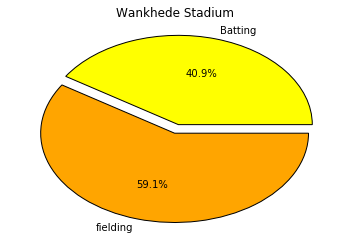

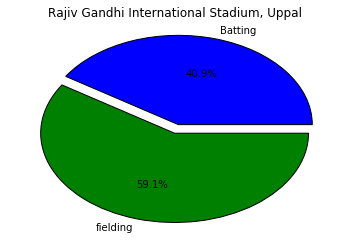

In [23]:
# 'M Chinnaswamy Stadium'
MC_stadium=df1.loc[(df1['venue']=='M Chinnaswamy Stadium') ]
MC_stadium_win=MC_stadium[MC_stadium['win_by_runs']>0]
plt.pie([len(MC_stadium_win),len(MC_stadium)-len(MC_stadium_win)],labels=['Batting','fielding'],explode=(0.1,0),autopct='%1.1f%%')
plt.title('M Chinnaswamy Stadium')
plt.show()


# Eden Gardens
E_stadium=df1.loc[(df1['venue']=='Eden Gardens') ]
E_stadium_win=E_stadium[E_stadium['win_by_runs']>0]
plt.pie([len(MC_stadium_win),len(MC_stadium)-len(MC_stadium_win)],labels=['Batting','fielding'],explode=(0.1,0),autopct='%1.1f%%',colors=['yellow','orange'])
plt.title('Eden Gardens')
plt.show()


# 'Feroz Shah Kotla'
FSK_stadium=df1.loc[(df1['venue']=='Feroz Shah Kotla') ]
FSK_stadium_win=FSK_stadium[FSK_stadium['win_by_runs']>0]
plt.pie([len(MC_stadium_win),len(MC_stadium)-len(MC_stadium_win)],labels=['Batting','fielding'],explode=(0.1,0),autopct='%1.1f%%')
plt.title('Feroz Shah Kotla')
plt.show()


# 'Wankhede Stadium'
W_stadium=df1.loc[(df1['venue']=='Wankhede Stadium') ]
W_stadium_win=W_stadium[W_stadium['win_by_runs']>0]
plt.pie([len(MC_stadium_win),len(MC_stadium)-len(MC_stadium_win)],labels=['Batting','fielding'],explode=(0.1,0),autopct='%1.1f%%',colors=['yellow','orange'])
plt.title('Wankhede Stadium')
plt.show()


# 'Rajiv Gandhi International Stadium, Uppal'
RG_stadium=df1.loc[(df1['venue']=='Rajiv Gandhi International Stadium, Uppal') ]
RG_stadium_win=RG_stadium[RG_stadium['win_by_runs']>0]
plt.pie([len(MC_stadium_win),len(MC_stadium)-len(MC_stadium_win)],labels=['Batting','fielding'],explode=(0.1,0),autopct='%1.1f%%')
plt.title('Rajiv Gandhi International Stadium, Uppal')
plt.show()


**Toss Decision to field or bat across seasons**

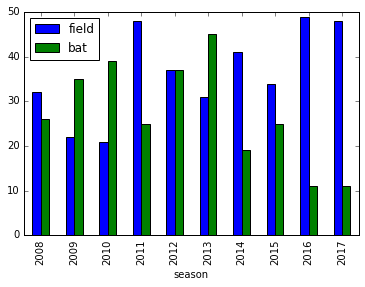

In [24]:
km=pd.DataFrame()
km['field']=df1[df1['toss_decision']=='field'].groupby(['season'])['season'].count()
km['bat']=df1[df1['toss_decision']=='bat'].groupby(['season'])['season'].count()
km.plot.bar()

**Top 15 run scorer in IPL**

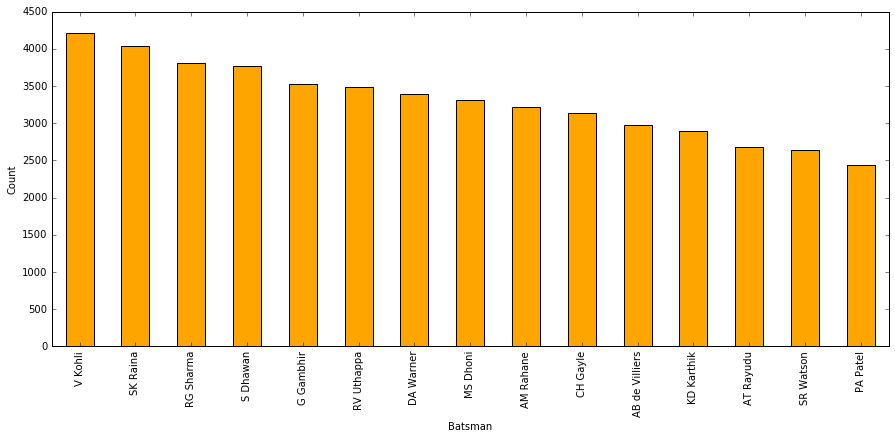

In [25]:
df2['batsman'].value_counts()[:15].plot.bar(figsize=(15,6), color='orange')
plt.xlabel('Batsman')
plt.ylabel('Count')
plt.show()

V Kohli is the top Run scorer in IPL

**Total Runs scored in each season**

([<matplotlib.axis.XTick at 0x261610d3b38>,
 <a list of 11 Text xticklabel objects>)

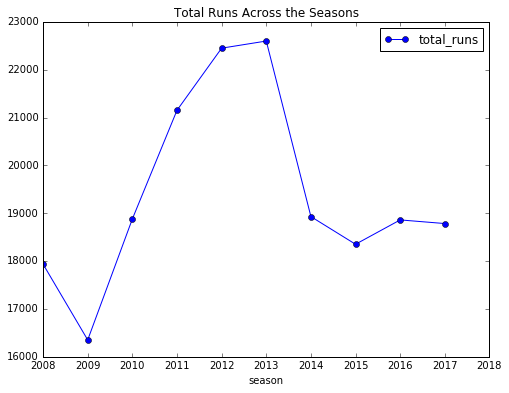

In [26]:
new = df1[['id','season']].merge(df2, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
s1=new.groupby(['season'])['total_runs'].sum().reset_index()
s1.set_index('season').plot(marker='o')
plt.gcf().set_size_inches(8,6)
plt.title('Total Runs Across the Seasons')
plt.xticks(range(2008,2019))


**Wickets across Season**

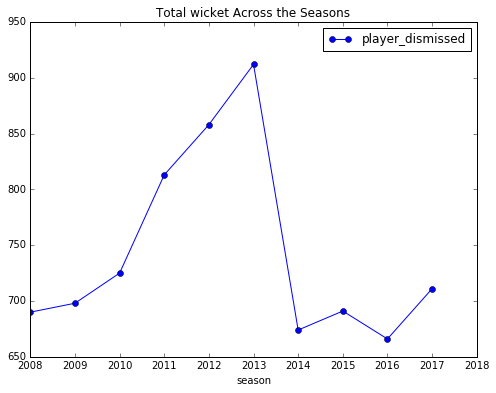

In [27]:
new = df1[['id','season']].merge(df2, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
s1=new.groupby(['season'])['player_dismissed'].count().reset_index()
s1.set_index('season').plot(marker='o')
plt.gcf().set_size_inches(8,6)
plt.title('Total wicket Across the Seasons')
plt.xticks(range(2008,2019))
plt.show()


 **Fours and sixs Analysis**

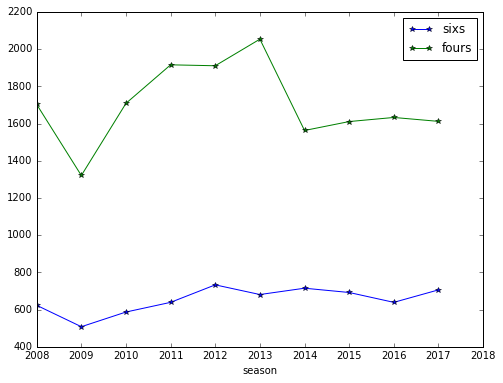

In [28]:
S_bound=new.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
p=new.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
S_bound=S_bound.merge(p,left_on='season',right_on='season',how='left')
S_bound=S_bound.rename(columns={'batsman_runs_x':'sixs','batsman_runs_y':'fours'})
S_bound.set_index('season')[['sixs','fours']].plot(marker='*')
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.xticks(range(2008,2019))
plt.show()

**Wide Runs Trend over the season**

([<matplotlib.axis.XTick at 0x26163df32e8>,
 <a list of 11 Text xticklabel objects>)

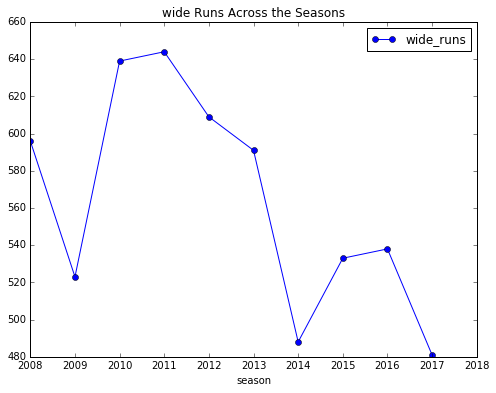

In [29]:
new = df1[['id','season']].merge(df2, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
s1=new.groupby(['season'])['wide_runs'].sum().reset_index()
s1.set_index('season').plot(marker='o')
plt.gcf().set_size_inches(8,6)
plt.title('wide Runs Across the Seasons')
plt.xticks(range(2008,2019))

**Legbye trend over season**

([<matplotlib.axis.XTick at 0x26160f42a20>,
 <a list of 11 Text xticklabel objects>)

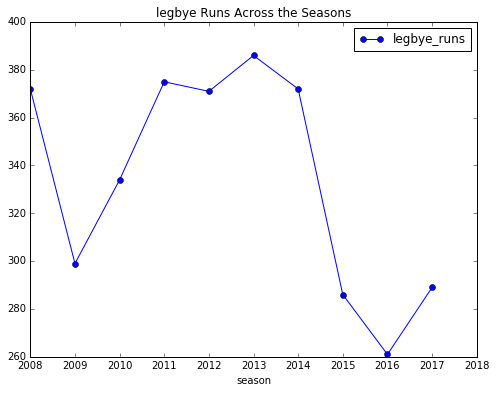

In [30]:
new = df1[['id','season']].merge(df2, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
s1=new.groupby(['season'])['legbye_runs'].sum().reset_index()
s1.set_index('season').plot(marker='o')
plt.gcf().set_size_inches(8,6)
plt.title('legbye Runs Across the Seasons')
plt.xticks(range(2008,2019))

**No Ball Trend over the season**

([<matplotlib.axis.XTick at 0x2615f173d68>,
 <a list of 11 Text xticklabel objects>)

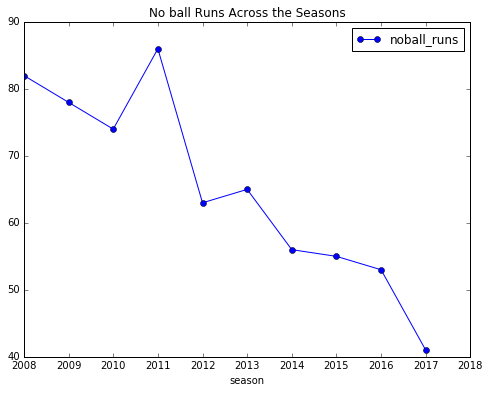

In [31]:
new = df1[['id','season']].merge(df2, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
s1=new.groupby(['season'])['noball_runs'].sum().reset_index()
s1.set_index('season').plot(marker='o')
plt.gcf().set_size_inches(8,6)
plt.title('No ball Runs Across the Seasons')
plt.xticks(range(2008,2019))

**Highest Run Matches and scoring team on basis of particular matches**

In [32]:
h_score=df2.groupby(['batting_team','match_id'])['total_runs'].sum().reset_index() 
h_score=h_score[h_score['total_runs']>=200].nlargest(10,'total_runs')
h_score

,batting_team,match_id,total_runs
1318,Royal Challengers Bangalore,411,263
795,Kolkata Knight Riders,7937,250
1368,Royal Challengers Bangalore,620,248
38,Chennai Super Kings,206,246
0,Chennai Super Kings,61,240
811,Kolkata Knight Riders,11338,239
1352,Royal Challengers Bangalore,562,235
1497,Sunrisers Hyderabad,11147,233
515,Kings XI Punjab,296,232
1506,Sunrisers Hyderabad,11339,232


**Wickets taken by top 10 bowlers**

In [33]:
df2.groupby(['bowler'])['player_dismissed'].count().reset_index().nlargest(10,'player_dismissed')

,bowler,player_dismissed
340,SL Malinga,188
93,DJ Bravo,168
7,A Mishra,165
126,Harbhajan Singh,161
264,PP Chawla,156
53,B Kumar,141
269,R Ashwin,138
347,SP Narine,137
381,UT Yadav,136
281,R Vinay Kumar,127


**conclusion**:
     * In the year 2013, most of the matches were played.
     * CH Gayle has received most of the Man of the match awards.
     * Mumbai Indians team is most successful Team . 
     * Most matches were played in Mumbai.
     * Most matches were played in M Chinnaswamy Stadium.
     * V Kohli is the top Run scorer in IPL

Companies must plan out a team with best combination of -
1. Top runners like V Kohli, SK Raina, RG Sharma
2. Man of the match like GH Gayle, YK Pathan, DA Warner
3. Bowlers like SL Malinga, DJ Bravo, A Mishra

Companies should endorse Mumbai Indians for their product as it is the most successful Team 